## Initialisation

### Dependencies

#### Third party

In [19]:
import numpy as np
from matplotlib import pyplot as plt

#### Personal notebook

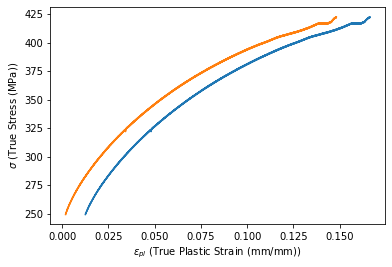

In [21]:
import ipynb

from ipynb.fs.full.true_strain_stress import (
    true_plastic_strain,
    true_stress,
)

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Calculation of constants in Hollomon equation

$$ \sigma = K \cdot \epsilon^n $$
$$ ln(\sigma) = ln(K) + n \cdot ln(\epsilon)$$

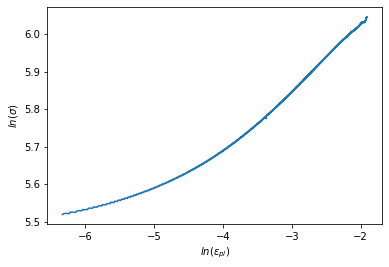

In [22]:
log_true_plastic_strain = np.log(true_plastic_strain)
log_true_stress = np.log(true_stress)
_ = plt.plot(log_true_plastic_strain, log_true_stress)
_ = plt.xlabel('$ln(\epsilon_{pl})$')
_ = plt.ylabel('$ln(\sigma)$')

In [23]:
# Considering true plastic strain instead of true strain for calculating work
# hardening exponent and strength coefficient.

reshaped_log_true_plastic_strain = log_true_plastic_strain.reshape((-1,1))
model = LinearRegression().fit(reshaped_log_true_plastic_strain, log_true_stress)
coef = model.score(reshaped_log_true_plastic_strain, log_true_stress)
work_hardening_exponent = model.coef_
logk = model.intercept_
strength_coefficient = np.exp(logk)
print ('Work hardening exponent:', work_hardening_exponent)
print('coefficient of determination:', coef)
print('Strength coefficient:', strength_coefficient)
Latex(r'$\sigma = %f \times \epsilon_{pl} ^ {%f}$' % (strength_coefficient, work_hardening_exponent[0]))

Work hardening exponent: [0.14959779]
coefficient of determination: 0.974197874682285
Strength coefficient: 551.1122004639817


<IPython.core.display.Latex object>

## Comparison of hollomon equation and experimental data

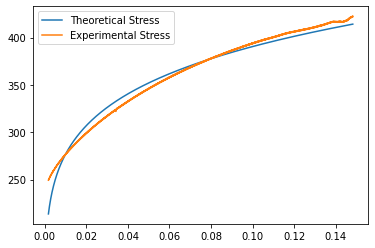

In [24]:
theoretical_stress = [strength_coefficient*(true_plastic_strain[i]**work_hardening_exponent[0]) for i in range(len(true_plastic_strain))]
plt.plot(true_plastic_strain, theoretical_stress, label='Theoretical Stress')
plt.plot(true_plastic_strain, true_stress, label='Experimental Stress')
plt.legend(loc='upper left')

## Work Hardening Rate plot

In [36]:
 _, _, d_sigma_epsilon, _ = differentiate(true_plastic_strain, true_stress)
# print(len(d_sigma_epsilon))
# plt.scatter(true_plastic_strain[:len(true_plastic_strain)-1], d_sigma_epsilon)

def func(strain, K, n):
  return K*(strain**n)

popt, pcov = optimize.curve_fit(func, true_plastic_strain[:len(true_plastic_strain)-1], d_sigma_epsilon, p0=[np.exp(logk), work_hardening_exponent[0]])

_ = plt.xlabel('$\epsilon_{pl}$')
_ = plt.ylabel('$\frac{d\sigma}{d\epsilon_{pl}}$')
_ = plt.plot(true_plastic_strain[:len(true_plastic_strain)-1], func(true_plastic_strain[:len(true_plastic_strain)-1], *popt), 'r-')

ValueError: 
$rac{d\sigma}{d\epsilon_{pl}}$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>